In [2]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm
import pickle

from IPython.display import clear_output

import warnings
warnings.filterwarnings('ignore')

# **Loading & Pre-Processing**

In [3]:
airline = pd.read_csv("https://raw.githubusercontent.com/vcos611/PRML/main/bonus_project/dataset/airline.csv")
airline


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


## Handling Null Values

In [4]:
# checking for missing values
airline.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [5]:
# dropping rows with missing values
airline.dropna(inplace=True)

## Seeing Distribution

AIRLINE :-
Jet Airways (3849)
IndiGo (2053)
Air India (1751)
Multiple carriers (1196)
SpiceJet (818)
Vistara (479)
Air Asia (319)
GoAir (194)
Multiple carriers Premium economy (13)
Jet Airways Business (6)
Vistara Premium economy (3)
Trujet (1)

--------------------------------------------------
SOURCE :-
Delhi (4536)
Kolkata (2871)
Banglore (2197)
Mumbai (697)
Chennai (381)

--------------------------------------------------
DESTINATION :-
Cochin (4536)
Banglore (2871)
Delhi (1265)
New Delhi (932)
Hyderabad (697)
Kolkata (381)

--------------------------------------------------
TOTAL_STOPS :-
1 stop (5625)
non-stop (3491)
2 stops (1520)
3 stops (45)
4 stops (1)

--------------------------------------------------
ADDITIONAL_INFO :-
No info (8344)
In-flight meal not included (1982)
No check-in baggage included (320)
1 Long layover (19)
Change airports (7)
Business class (4)
No Info (3)
1 Short layover (1)
Red-eye flight (1)
2 Long layover (1)

-------------------------------------------

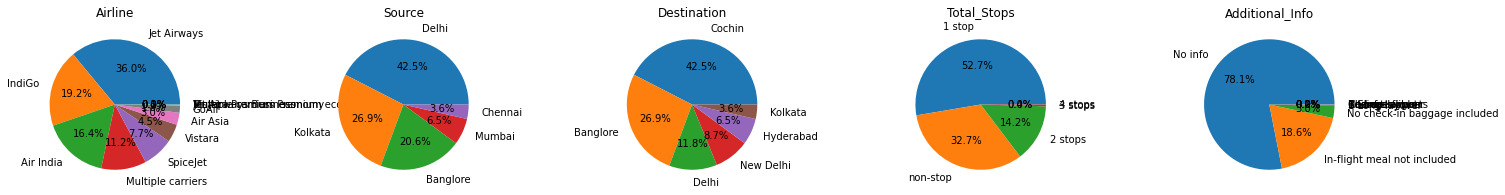

In [6]:
# viewing the distirbution of the data
cols1 = ['Airline','Source','Destination','Total_Stops','Additional_Info']
fig, ax = plt.subplots(1,len(cols1), figsize=(25,3))
for i in range(len(cols1)):
    freq = dict(airline[cols1[i]].value_counts())
    print(cols1[i].upper(),":-")
    for key in freq:
        print("{} ({})".format(key,freq[key]))
    print("\n","-"*50,sep='')
    count, label = freq.values(), freq.keys()
    ax[i].pie(count,labels=label,labeldistance=1.2,autopct='%1.1f%%')
    ax[i].set_title(cols1[i])
plt.show()

## Encoding

In [7]:
# Label Encode
airline['Airline'] = airline['Airline'].astype('category').cat.codes
airline['Source'] = airline['Source'].astype('category').cat.codes
airline['Destination'] = airline['Destination'].astype('category').cat.codes

# One Hot Encode
airline = pd.get_dummies(airline, columns=['Additional_Info'])

In [8]:
day, month, year = [],[],[]

for i in tqdm(airline.index, desc="Encodin all rows"):

    # encoding Total Stops
    if airline.loc[i,'Total_Stops'] == 'non-stop':
        airline.loc[i,'Total_Stops'] = 0
    else:
        airline.loc[i,'Total_Stops'] = int(airline.loc[i,'Total_Stops'].split()[0])

    # encdoing Date of Journey
    date = airline.loc[i,'Date_of_Journey'].split('/')
    day.append(int(date[0]))
    month.append(int(date[1]))
    year.append(int(date[2]))

    # encoding Time
    h,m = airline.loc[i,'Dep_Time'].split(':')
    airline.loc[i,'Dep_Time'] = int(h)*60 + int(m)

    # encoding Duration
    dur = airline.loc[i,'Duration'].split()
    if len(dur)==1:
        airline.loc[i,'Duration'] = int(dur[0][:-1])*60
    else:
        airline.loc[i,'Duration'] = int(dur[0][:-1])*60 + int(dur[1][:-1])


airline['Day'] = day
airline['Month'] = month
airline['Year'] = year

airline


Encodin all rows: 100%|██████████| 10682/10682 [00:08<00:00, 1272.84it/s]


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,...,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight,Day,Month,Year
0,3,24/03/2019,0,5,BLR ? DEL,1340,01:10 22 Mar,170,0,3897,...,0,0,0,0,0,1,0,24,3,2019
1,1,1/05/2019,3,0,CCU ? IXR ? BBI ? BLR,350,13:15,445,2,7662,...,0,0,0,0,0,1,0,1,5,2019
2,4,9/06/2019,2,1,DEL ? LKO ? BOM ? COK,565,04:25 10 Jun,1140,2,13882,...,0,0,0,0,0,1,0,9,6,2019
3,3,12/05/2019,3,0,CCU ? NAG ? BLR,1085,23:30,325,1,6218,...,0,0,0,0,0,1,0,12,5,2019
4,3,01/03/2019,0,5,BLR ? NAG ? DEL,1010,21:35,285,1,13302,...,0,0,0,0,0,1,0,1,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,9/04/2019,3,0,CCU ? BLR,1195,22:25,150,0,4107,...,0,0,0,0,0,1,0,9,4,2019
10679,1,27/04/2019,3,0,CCU ? BLR,1245,23:20,155,0,4145,...,0,0,0,0,0,1,0,27,4,2019
10680,4,27/04/2019,0,2,BLR ? DEL,500,11:20,180,0,7229,...,0,0,0,0,0,1,0,27,4,2019
10681,10,01/03/2019,0,5,BLR ? DEL,690,14:10,160,0,12648,...,0,0,0,0,0,1,0,1,3,2019


In [9]:
airline.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops', 'Price',
       'Additional_Info_1 Long layover', 'Additional_Info_1 Short layover',
       'Additional_Info_2 Long layover', 'Additional_Info_Business class',
       'Additional_Info_Change airports',
       'Additional_Info_In-flight meal not included',
       'Additional_Info_No Info',
       'Additional_Info_No check-in baggage included',
       'Additional_Info_No info', 'Additional_Info_Red-eye flight', 'Day',
       'Month', 'Year'],
      dtype='object')

In [10]:
# dropping useless columns
airline.drop(['Date_of_Journey','Route','Arrival_Time','Additional_Info_No Info','Additional_Info_No info','Year'],axis=1,inplace=True)
rename_maps = {key:key.replace("Additional_Info_","") for key in airline.columns if "Additional_Info" in key}
airline.rename(columns=rename_maps,inplace=True)
airline

,Airline,Source,Destination,Dep_Time,Duration,Total_Stops,Price,1 Long layover,1 Short layover,2 Long layover,Business class,Change airports,In-flight meal not included,No check-in baggage included,Red-eye flight,Day,Month
0,3,0,5,1340,170,0,3897,0,0,0,0,0,0,0,0,24,3
1,1,3,0,350,445,2,7662,0,0,0,0,0,0,0,0,1,5
2,4,2,1,565,1140,2,13882,0,0,0,0,0,0,0,0,9,6
3,3,3,0,1085,325,1,6218,0,0,0,0,0,0,0,0,12,5
4,3,0,5,1010,285,1,13302,0,0,0,0,0,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,1195,150,0,4107,0,0,0,0,0,0,0,0,9,4
10679,1,3,0,1245,155,0,4145,0,0,0,0,0,0,0,0,27,4
10680,4,0,2,500,180,0,7229,0,0,0,0,0,0,0,0,27,4
10681,10,0,5,690,160,0,12648,0,0,0,0,0,0,0,0,1,3


## Splitting

In [11]:
# splitting data into train and test
train_test = airline.sample(frac=0.8,random_state=200)
valid = airline.drop(train_test.index)
test = train_test.sample(frac=0.125,random_state=200)
train = train_test.drop(test.index)

target = 'Price'
features = [col for col in train.columns if col != target]
x_train, y_train = train[features], train[target]
x_test, y_test = test[features], test[target]
x_valid, y_valid = valid[features], valid[target]



## Scaling

In [12]:
# scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_valid = scaler.transform(x_valid)

# **Training and Testing Models**

In [13]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.svm import LinearSVR


In [14]:
models = {
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'XGBoost': XGBRegressor(),
    'LightGBM': LGBMRegressor(),
    'KNN': KNeighborsRegressor(),
    'Linear Regression': LinearRegression(),
    'Logistic Regression': LogisticRegression(),
    'SVR': SVR(),
    'Linear SVR': LinearSVR()
}

In [15]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

r2_, r2train, mse_, mse_train = {},{},{},{}
for mod in tqdm(models, desc='Trying all models'):
    regres = models[mod]
    regres.fit(x_train, y_train)
    y_pred = regres.predict(x_valid)
    y_pred_train = regres.predict(x_train)
    r2_[mod] = r2_score(y_valid, y_pred)
    r2train[mod] = r2_score(y_train, y_pred_train)
    mse_[mod] = mse(y_valid, y_pred)
    mse_train[mod] = mse(y_train, y_pred_train)

Trying all models: 100%|██████████| 9/9 [01:05<00:00,  7.31s/it]


## Tabulating the Results

In [16]:
print("{:<30}{:<30}{:<40}".format("Model", "R2 Score", "MSE"))
print("{:<30}{:<12}{:<18}{:<20}{:<20}".format("","Training", "Validation", "Training", "Validation"))
print()
for mod in models:
    print("{:<30}{:<12.4f}{:<18.2f}{:<20.4f}{:<20.2f}".format(mod, r2train[mod], r2_[mod], mse_train[mod], mse_[mod]))

Model                         R2 Score                      MSE                                     
                              Training    Validation        Training            Validation          

Decision Tree                 0.9963      0.79              75288.5600          4663934.59          
Random Forest                 0.9784      0.84              441517.2471         3572653.10          
XGBoost                       0.9619      0.86              780860.6267         3224506.35          
LightGBM                      0.9064      0.85              1916199.0771        3371929.49          
KNN                           0.8432      0.76              3210392.4841        5290864.31          
Linear Regression             0.4909      0.44              10421827.9526       12602985.56         
Logistic Regression           0.4440      0.42              11381439.8538       13053869.61         
SVR                           0.0527      0.04              19392609.5502       21591013.8

## Plotting the Results

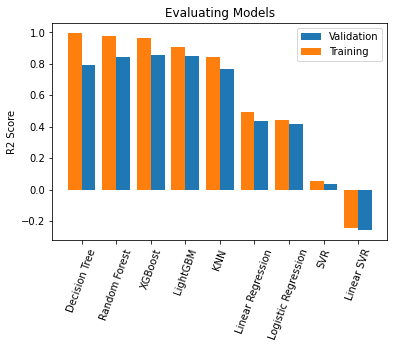

In [17]:
# plotting bar graph
xaxis = np.arange(len(models))
plt.bar(xaxis+0.2, list(r2_.values()), label='Validation', width=0.4)
plt.bar(xaxis-0.2, list(r2train.values()), label='Training', width=0.4)
plt.ylabel('R2 Score')
plt.title('Evaluating Models')
plt.xticks(xaxis, list(r2_.keys()), rotation=70)
plt.legend()
plt.show()

# **Parameter Tuning**

In [18]:
# optimising parameters of Random Forest
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
regres = RandomForestRegressor()
param_grid = {
    'n_estimators': [100,200,400,800],
    'max_depth': [2,4,8,16,32],
    'min_samples_split': [2,4,8],
    'min_samples_leaf': [1,2,4],
}
hgs = HalvingGridSearchCV(
    regres,
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=2
)
hgs.fit(x_train, y_train)
clear_output(wait=True)

RFR = hgs.best_estimator_
y_pred = RFR.predict(x_valid)
print("Validation R2 Score after tuning:", r2_score(y_valid, y_pred))
print('Best Parameters for random forest:\n',hgs.best_params_)

Validation R2 Score after tuning: 0.8498032791383738
Best Parameters for random forest:
 {'max_depth': 32, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 800}


In [19]:
# optimising parameters of XGBoost
regres = XGBRegressor()
param_grid = {
    'n_estimators': [100,400,1000],
    'max_depth': [2,4,8,16],
    'learning_rate': [0.01,0.1,0.2,0.3],
    'subsample': [0.6,0.8,1]
}
hgs = HalvingGridSearchCV(
    regres,
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=2
)
hgs.fit(x_train, y_train)
clear_output(wait=True)

XG = hgs.best_estimator_
y_pred = XG.predict(x_valid)
print("Validation R2 Score after tuning:", r2_score(y_valid, y_pred))
print('Best Parameters for XG Boost\n',hgs.best_params_)

Validation R2 Score after tuning: 0.8679032998242611
Best Parameters for XG Boost
 {'learning_rate': 0.2, 'max_depth': 8, 'n_estimators': 100, 'subsample': 0.6}


In [20]:
# optimising parameters of LightGBM
regres = LGBMRegressor()
param_grid = {
    'n_estimators': [100,400,1000],
    'max_depth': [2,4,8,16],
    'learning_rate': [0.01,0.1,0.2,0.3],
    'subsample': [0.6,0.8,1]
}
hgs = HalvingGridSearchCV(
    regres,
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=2
)
hgs.fit(x_train, y_train)
clear_output(wait=True)

LGB = hgs.best_estimator_
y_pred = LGB.predict(x_valid)
print("Validation R2 Score after tuning:", r2_score(y_valid, y_pred))
print("Best Parameters for LightGBM\n",hgs.best_params_)


Validation R2 Score after tuning: 0.847723898832112
Best Parameters for LightGBM
 {'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 1000, 'subsample': 0.8}


# **Making Ensemble**

In [21]:
class average_ensemble():
    def __init__(self, models):
        self.models = models
        self.weights = None
    
    def fit(self, X, y):
        for model in self.models:
            model.fit(X, y)
        return self
    
    def predict(self, X):
        predictions = np.array([model.predict(X) for model in self.models]).T
        if self.weights is None:
            self.weights = np.repeat(1/len(self.models), len(self.models))
        weighted_predictions = np.average(predictions, axis=1, weights=self.weights)
        return weighted_predictions

model = average_ensemble([RFR, XG, LGB])
X = np.vstack((x_train,x_valid))
y = np.hstack((y_train,y_valid))
model.fit(X, y)

# **Evaluation on Test Data**

Testing all models: 100%|██████████| 3/3 [00:00<00:00, 12.19it/s]


Final Test Results (on untouched Test Data):

Model                         R2 Score       MSE            

Random Forest                 0.8770         2998604.73     
XGBoost                       0.9249         1831359.50     
LightGBM                      0.8630         3340695.09     

Ensemble                      0.9012         2408355.93     


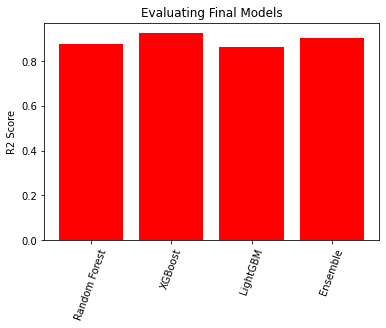

In [23]:
# Testing on final Test data
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

models = {
    'Random Forest' : RFR,
    'XGBoost' : XG,
    'LightGBM' : LGB,
}

r2_, mse_ = {},{}
for mod in tqdm(models, desc='Testing all models'):
    y_pred = models[mod].predict(x_test)
    r2_[mod] = r2_score(y_test, y_pred)
    mse_[mod] = mse(y_test, y_pred)

print("Final Test Results (on untouched Test Data):\n")
print("{:<30}{:<15}{:<15}".format("Model", "R2 Score", "MSE"))
print()
for mod in models:
    print("{:<30}{:<15.4f}{:<15.2f}".format(mod, r2_[mod], mse_[mod]))
print()
y_pred = model.predict(x_test)
print("{:<30}{:<15.4f}{:<15.2f}".format("Ensemble", r2_score(y_test, y_pred), mse(y_test, y_pred)))
r2_['Ensemble'] = r2_score(y_test, y_pred)

# plotting bar graph
xaxis = np.arange(len(r2_))
plt.bar(xaxis, list(r2_.values()),color='red')
plt.ylabel('R2 Score')
plt.title('Evaluating Final Models')
plt.xticks(xaxis, list(r2_.keys()), rotation=70)
plt.show()

# **Saving the Model for Deployment**

In [24]:
# using the entire data for training
model = average_ensemble([RFR, XG, LGB])
X = airline[features]
y = airline[target]
scaler = StandardScaler()
X = scaler.fit_transform(X)
model.fit(X, y)

# saving the scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# saving the model
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)